### EDA (Exploratory Data Analysis)

#### Install necessay Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # To enable drawing of matplotlib charts in the IPython environment

In [6]:
import plotly as py
import cufflinks as cf # A library to connect plotly and pandas for visualization on data frames

In [7]:
# To make plotly and cufflinks work offline mode
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [8]:
# Load the dataset
world_cups = pd.read_csv('world_cup_cl.csv')
matches = pd.read_csv('matches_cl.csv')
players = pd.read_csv('players_cl.csv')

Let's check the cleaned datasets

In [15]:
# Display the shape of the three dataset
print("Shape of the three datasets are: ", world_cups.shape, matches.shape, players.shape)

Shape of the three datasets are:  (850, 10) (20, 8) (37784, 8)


Question_1. Which country won the most?

In [16]:
# Who won during those tournaments 
winner = matches['winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
England      1
Spain        1
France       1
Name: winner, dtype: int64

In [17]:
# Who were in the second position
second = matches['runners-up'].value_counts()
second

Germany           4
Netherlands       3
Argentina         3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
France            1
Sweden            1
Name: runners-up, dtype: int64

In [18]:
# Who were in the third position
third = matches['third'].value_counts()
third

Germany        4
Poland         2
Sweden         2
France         2
Brazil         2
Netherlands    1
Italy          1
USA            1
Croatia        1
Portugal       1
Turkey         1
Chile          1
Austria        1
Name: third, dtype: int64

In [19]:
# Add up the above three series   
teams = pd.concat([winner, second, third], axis = 1)
teams

,winner,runners-up,third
Brazil,5.0,2.0,2.0
Germany,4.0,4.0,4.0
Italy,4.0,2.0,1.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
Spain,1.0,NaN,NaN
France,1.0,1.0,2.0
Netherlands,NaN,3.0,1.0
Czechoslovakia,NaN,2.0,NaN


In [20]:
# To make the columns name consistence and self explanatory let's change the 2nd name to second 
teams.columns = ['winner', 'second','third']
teams.columns

Index(['winner', 'second', 'third'], dtype='object')

In [22]:
# As we can see our teams dataset has given null values in each column for countries which doesn't have a datapoint. 
# So, we have to fill those null values with 0 and chnage the datatype of the columns to integer from float
teams.fillna(0, inplace = True)
teams = teams.astype(int)
teams

,winner,second,third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
Spain,1,0,0
France,1,1,2
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [23]:
# Plot the chart
teams.iplot(kind = 'bar', xTitle = 'Teams', yTitle = 'Count', title = 'Winners Rank')

Question 2. How many number of goals per country?

In [34]:
# Select the necessary columns
home = world_cups[['home team name', 'home team goals']]
away = world_cups[['away team name', 'away team goals']]

In [35]:
# Replace the column names to make it self explanatory
home.columns = ['Countries', 'Goals']
# Make the column names of both tables the same
away.columns = home.columns

In [39]:
# Append away table to home but drop or ignore the index
goals = home.append(away, ignore_index=True)
# Group by country and sum up the the total goals
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12
Angola,1
Argentina,133
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [40]:
# Sort the out put by goal in decending order
goals = goals.sort_values(by = 'Goals', ascending = False)
goals

,Goals
Countries,
Germany,231
Brazil,225
Argentina,133
Italy,128
France,108
...,...
Dutch East Indies,0
China PR,0
Trinidad and Tobago,0


In [42]:
# Display the top 20 country
goals[:20].iplot(kind = 'bar', xTitle = 'Country Names', yTitle = "Goals", title = 'Countries hits most number of goals')

Question 3. Which matches has highest number of attendance?

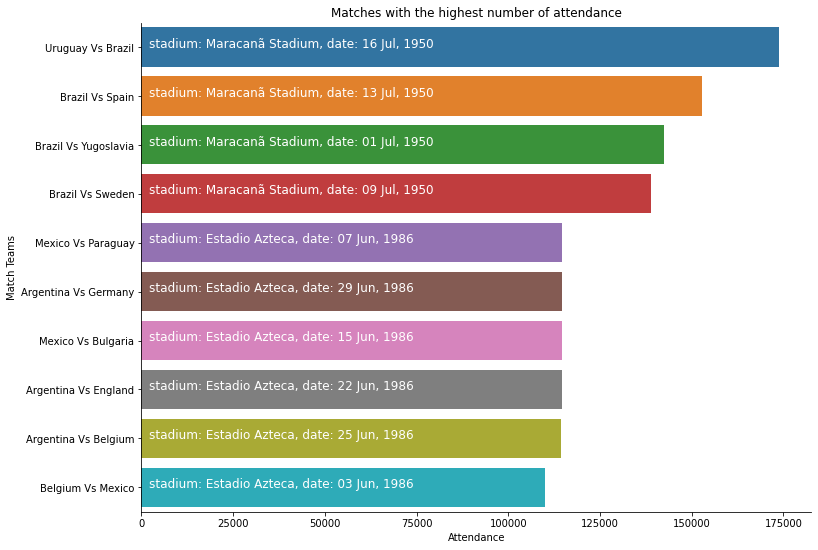

In [44]:
top_ten = world_cups.sort_values(by = 'attendance', ascending = False)[:10]
top_ten['Vs'] = top_ten['home team name'] + " Vs " + top_ten["away team name"]

plt.figure(figsize = (12,9))

ax = sns.barplot(y = top_ten['Vs'], x = top_ten['attendance'])

sns.despine(right = True) # To remove the left line

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of attendance')

for i, s in enumerate("stadium: " + top_ten['stadium'] + ", date: " + top_ten['datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()

Question_4. Which stadiums has highest average attendance?

In [45]:
stadium  = world_cups.groupby(['stadium','city'])['attendance'].mean().reset_index().sort_values(by = 'attendance', ascending = False)
stadium_10 = stadium[:10]
stadium_10

,stadium,city,attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracanã Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
145,Santiago Bernabeu,Madrid,82522.250000
166,Stanford Stadium,San Francisco,81737.333333
158,Stade de France,Saint-Denis,78222.222222
63,Giants Stadium,New York/New Jersey,73689.714286
163,Stadio Olimpico,Rome,73373.000000


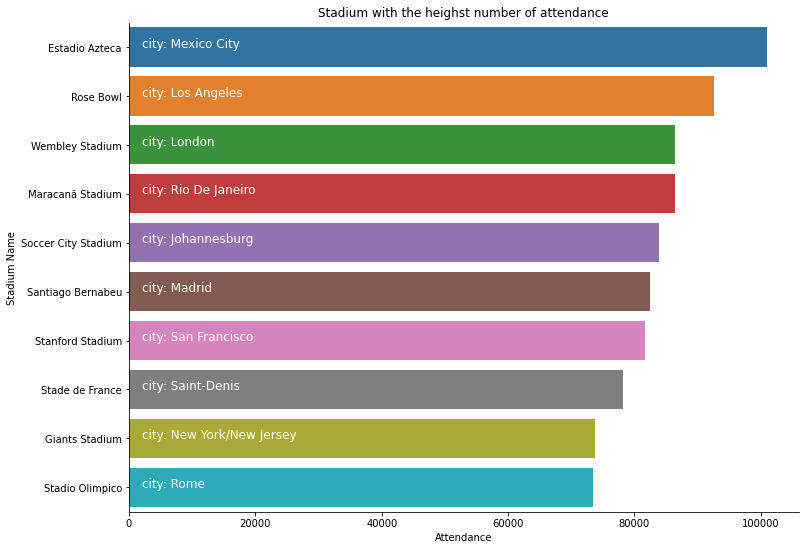

In [48]:
plt.figure(figsize = (12,9))
ax = sns.barplot(y = stadium_10['stadium'], x = stadium_10['attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Name')
plt.xlabel('Attendance')
plt.title('Stadium with the heighst number of attendance')

for i, s in enumerate("city: " + stadium_10['city']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()

Question_5. Match outcomes by home and away teams/ what is the percentage of win and loss when they play home and away? place.

In [53]:
# Find out who won the most
def labels(world_cups):
    if world_cups["home team goals"] > world_cups["away team goals"]:
        return 'Home Team Win'
    if world_cups['home team goals'] < world_cups['away team goals']:
        return 'Away Team Win'

In [62]:
# Create outcomes column which holds the result of winners
world_cups['outcomes'] = world_cups.apply(lambda x: labels(x), axis = 1)

In [63]:
# Drop the unnamed:0 column and assign the new dataframe to new variable name 
world_cups_ = world_cups.drop("Unnamed: 0", axis='columns')
# Check the dataset
world_cups_.head(2)

,year,datetime,stadium,city,home team name,home team goals,away team goals,away team name,attendance,outcomes
0,1930,"13 Jul, 1930",Pocitos,Montevideo,France,4,1,Mexico,4444,Home Team Win
1,1930,"13 Jul, 1930",Parque Central,Montevideo,USA,3,0,Belgium,18346,Home Team Win


In [64]:
# Calculate the frequency of the outcome column values
drow = world_cups_['outcomes'].value_counts()
drow

Home Team Win    486
Away Team Win    174
Name: outcomes, dtype: int64

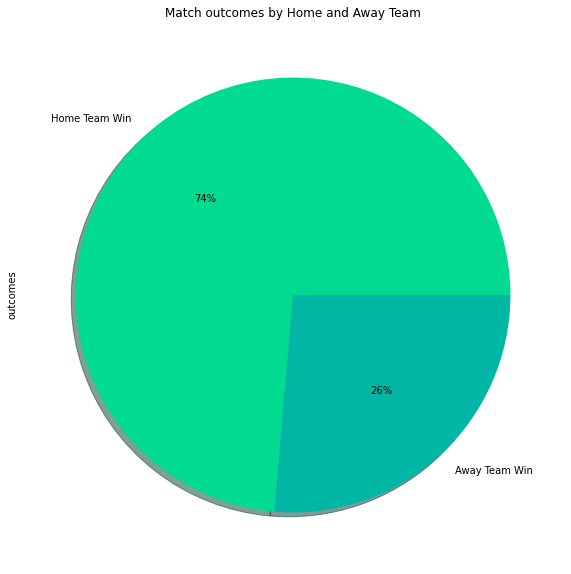

In [65]:
# Visualize the outcomes 
plt.figure(figsize = (10,10))
drow.plot.pie(autopct = "%1.0f%%" , colors = sns.color_palette('winter_r'), shadow = True)
plt.title("Match outcomes by Home and Away Team")
plt.show()